In [1]:
import pandas as pd
import numpy as np

In [2]:
df  = pd.read_csv("B:\Dublin City University\DMV\DMV_dataset.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
print(df.isna().sum())

Date              0
Ticker            0
Open            109
High            109
Low             109
Close           106
Volume            0
Dividends         0
Stock Splits      0
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.set_index('Date', inplace=True)


In [6]:
df['Open'] = df['Open'].interpolate(method='time')
df['High'] = df['High'].interpolate(method='time')
df['Low'] = df['Low'].interpolate(method='time')
df['Close'] = df['Close'].interpolate(method='time')

In [7]:
print(df.isna().sum())

Ticker          0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [8]:
tickers  = df['Ticker'].unique()

In [9]:
import yfinance as yf
from tqdm import tqdm

In [10]:
sectorlist = []

In [11]:
import time
import concurrent.futures

In [ ]:
# sectors = {'Healthcare': [], 'Tech': [], 'Finance': [], 'Energy': [], 'Materials': [], 'Consumer Discretionary': [], 'Consumer Staples': [], 'Utilities': [], 'Real Estate': [], 'Industrials': [], 'Telecommunication Services': [], 'Other': []}

def get_sector_info(ticker):
    try:
        stock = yf.Ticker(ticker)
        time.sleep(2)  # Add a delay of 2 seconds between requests
        sector = stock.info.get('sector', 'Other')
        return sector
    except Exception as e:
        return 'Other'

all_tickers = df['Ticker'].unique()

sector_counts = {}  # Dictionary to store sectors and their counts
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    sectorlist = list(executor.map(get_sector_info, all_tickers))

# Group by sector and count tickers
for sector in sectorlist:
    sector_counts[sector] = sector_counts.get(sector, 0) + 1

# Output the results
for sector, count in sector_counts.items():
    print(f'{sector}: {count} tickers')

"""def get_sector_info(ticker):
    retries = 3
    for attempt in range(retries):
        try:
            stock = yf.Ticker(ticker)
            sector = stock.info.get('sector', 'Other')
            return sector
        except (KeyError, ConnectionError) as e:
            print(f'Error occurred while trying to get sector for {ticker}: {e}')
            if attempt < retries - 1:
                continue
            else:
                return 'Other'
            
batch_size = 5
all_tickers = df['Ticker'].unique()

for i in range(0, len(all_tickers), batch_size):
    batch = all_tickers[i:i + batch_size]
    time.sleep(2)
    for ticker in batch:
        sector = get_sector_info(ticker)
        sectorlist.append(sector)
        # Add a delay of 1 second between each request to avoid rate limits
        

from collections import Counter
sector_count = Counter(sectorlist)
print("Sector distribution:", sector_count)

"""
# Output how many tickers belong to each sector
# for sector, tickers in sectors.items():
    # print(f"{sector}: {len(tickers)} tickers")
'''
for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
        sector = stock.info['sector']
        if sector in sectors:
            sectors[sector].append(ticker)
        else:
            sectors['Other'].append(ticker)
    except KeyError:
        sectors['Other'].append(ticker)
        
for sector, tickers_in_sector in sectors.items():
    print(f'{sector}: {len(tickers_in_sector)} tickers')
'''

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PHYT-UN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PHYT-UN&crumb=.jndXMr6jVS
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RRAC-UN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RRAC-UN&crumb=.jndXMr6jVS
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRLI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRLI&crumb=.jndXMr6jVS
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LEC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=f

Utilities: 195 tickers
Energy: 371 tickers
Industrials: 923 tickers
Technology: 1055 tickers
Consumer Cyclical: 753 tickers
Healthcare: 1588 tickers
Communication Services: 395 tickers
Consumer Defensive: 395 tickers
Basic Materials: 482 tickers
Financial Services: 1985 tickers
Real Estate: 464 tickers
Other: 709 tickers


"\nfor ticker in tickers:\n    stock = yf.Ticker(ticker)\n    try:\n        sector = stock.info['sector']\n        if sector in sectors:\n            sectors[sector].append(ticker)\n        else:\n            sectors['Other'].append(ticker)\n    except KeyError:\n        sectors['Other'].append(ticker)\n        \nfor sector, tickers_in_sector in sectors.items():\n    print(f'{sector}: {len(tickers_in_sector)} tickers')\n"

In [16]:
sector_data = {
    'Sector': ['Utilities', 'Energy', 'Industrials', 'Technology', 'Consumer Cyclical',
               'Healthcare', 'Communication Services', 'Consumer Defensive',
               'Basic Materials', 'Financial Services', 'Real Estate', 'Other'],
    'Tickers': [195, 371, 923, 1055, 753, 1588, 395, 395, 482, 1985, 464, 709]
}

# Creating DataFrame
sector_df = pd.DataFrame(sector_data)
print(sector_df)

                    Sector  Tickers
0                Utilities      195
1                   Energy      371
2              Industrials      923
3               Technology     1055
4        Consumer Cyclical      753
5               Healthcare     1588
6   Communication Services      395
7       Consumer Defensive      395
8          Basic Materials      482
9       Financial Services     1985
10             Real Estate      464
11                   Other      709


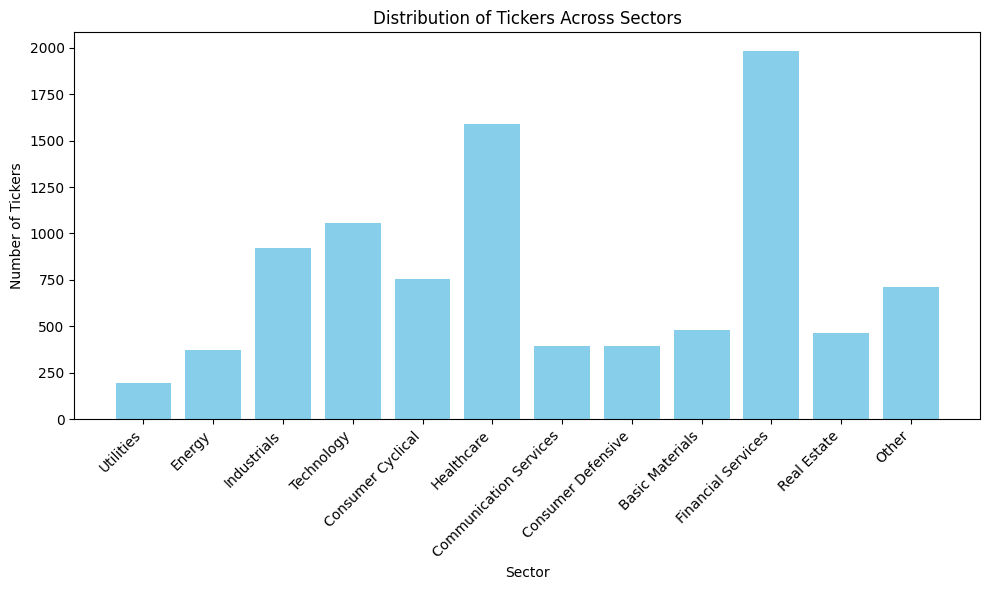

In [17]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sector_df['Sector'], sector_df['Tickers'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sector')
plt.ylabel('Number of Tickers')
plt.title('Distribution of Tickers Across Sectors')
plt.tight_layout()
plt.show()

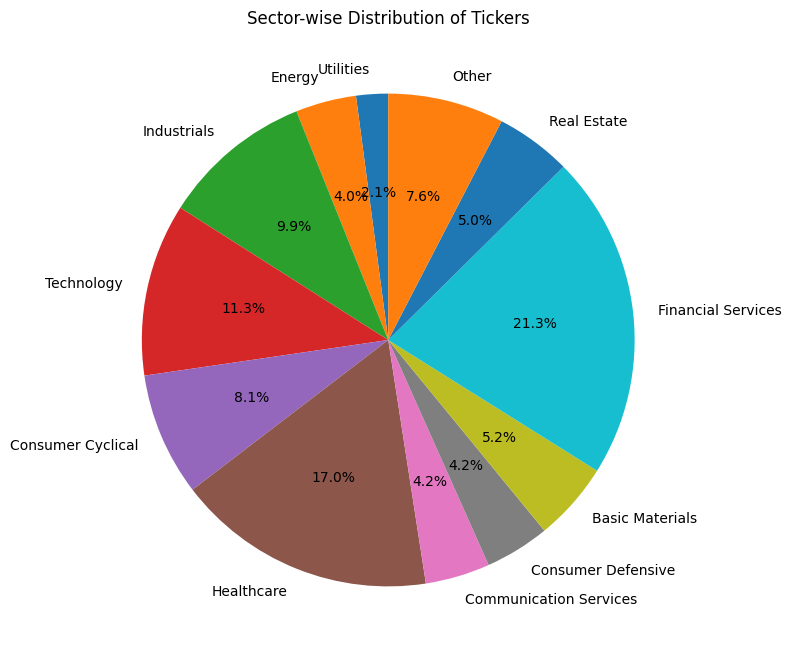

In [18]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_df['Tickers'], labels=sector_df['Sector'], autopct='%1.1f%%', startangle=90)
plt.title('Sector-wise Distribution of Tickers')
plt.show()

In [21]:
df.head()

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1962-01-02,ED,0.0,0.265828,0.261788,0.261788,25600.0,0.0,0.0
1962-01-02,CVX,0.0,0.046809,0.046069,0.046809,105840.0,0.0,0.0
1962-01-02,GD,0.0,0.210033,0.203061,0.208290,2648000.0,0.0,0.0
1962-01-02,BP,0.0,0.141439,0.139528,0.139528,77440.0,0.0,0.0
1962-01-02,MSI,0.0,0.764923,0.745254,0.751810,65671.0,0.0,0.0


In [22]:
ticker_sector_map = dict(zip(all_tickers, sectorlist))

# Create a new column 'Sector' in the original dataframe based on the 'Ticker'
df['Sector'] = df['Ticker'].map(ticker_sector_map)

# Check the updated dataframe to ensure the 'Sector' column has been added
print(df[['Ticker', 'Sector']].head())

           Ticker       Sector
Date                          
1962-01-02     ED    Utilities
1962-01-02    CVX       Energy
1962-01-02     GD  Industrials
1962-01-02     BP       Energy
1962-01-02    MSI   Technology


In [23]:
df.head()

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,Sector
Date,,,,,,,,,
1962-01-02,ED,0.0,0.265828,0.261788,0.261788,25600.0,0.0,0.0,Utilities
1962-01-02,CVX,0.0,0.046809,0.046069,0.046809,105840.0,0.0,0.0,Energy
1962-01-02,GD,0.0,0.210033,0.203061,0.208290,2648000.0,0.0,0.0,Industrials
1962-01-02,BP,0.0,0.141439,0.139528,0.139528,77440.0,0.0,0.0,Energy
1962-01-02,MSI,0.0,0.764923,0.745254,0.751810,65671.0,0.0,0.0,Technology


In [25]:
df.tail()

,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,Sector
Date,,,,,,,,,
2024-11-04,NEOG,14.490000,14.580000,14.340000,14.345000,18972.0,0.0,0.0,Healthcare
2024-11-04,ENLV,1.400000,1.428900,1.330000,1.350000,28794.0,0.0,0.0,Healthcare
2024-11-04,FAMI,0.320000,0.320000,0.300100,0.300100,77650.0,0.0,0.0,Consumer Defensive
2024-11-04,NNN,43.730000,43.439999,43.209999,43.244999,88675.0,0.0,0.0,Real Estate
2024-11-04,SHOO,44.740002,45.150002,44.724998,45.000000,26010.0,0.0,0.0,Consumer Cyclical


In [30]:
df.reset_index(inplace=True)


In [ ]:
df.to_csv("B:/Dublin City University/DMV/DMV_dataset_with_sectors1.csv", index=False)
print("File saved successfully.")

File saved successfully.


In [ ]:
# Group the data by 'Sector'
sector_group = df.groupby('Sector').agg({
    'Close': 'mean',  # Average closing price per sector
    'Volume': 'mean'  # Average volume per sector
}).reset_index()

print(sector_group)

                    Sector         Close        Volume
0          Basic Materials  1.854449e+24  8.787709e+05
1   Communication Services -7.508970e+14  2.557300e+06
2        Consumer Cyclical  6.696047e+05  1.802548e+06
3       Consumer Defensive  3.302015e+04  1.447270e+06
4                   Energy  2.756226e+11  1.420547e+06
5       Financial Services -1.512097e+07  6.608564e+05
6               Healthcare  4.937329e+09  8.651292e+05
7              Industrials  4.124850e+06  7.393143e+05
8                    Other  4.360647e+07  1.193207e+06
9              Real Estate  5.174714e+02  5.438120e+05
10              Technology  6.190133e+06  3.892308e+06
11               Utilities  1.143895e+05  6.678171e+05


C:\Users\abhis\AppData\Local\Temp\ipykernel_15068\3605436165.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sector_group['Sector'], rotation=45, ha='right')


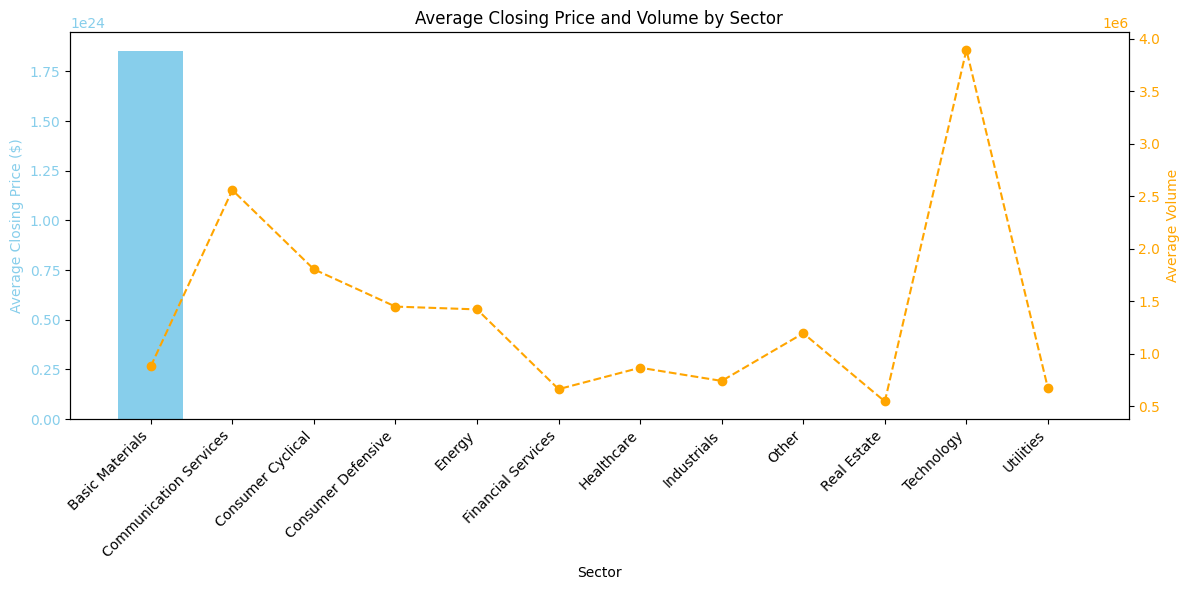

In [ ]:
# Set up a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average closing price per sector
ax1.bar(sector_group['Sector'], sector_group['Close'], color='skyblue', label='Average Closing Price')
ax1.set_xlabel('Sector')
ax1.set_ylabel('Average Closing Price ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(sector_group['Sector'], rotation=45, ha='right')

# Create a second y-axis to plot volume
ax2 = ax1.twinx()
ax2.plot(sector_group['Sector'], sector_group['Volume'], color='orange', marker='o', label='Average Volume', linestyle='--')
ax2.set_ylabel('Average Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Average Closing Price and Volume by Sector')

plt.tight_layout()
plt.show()

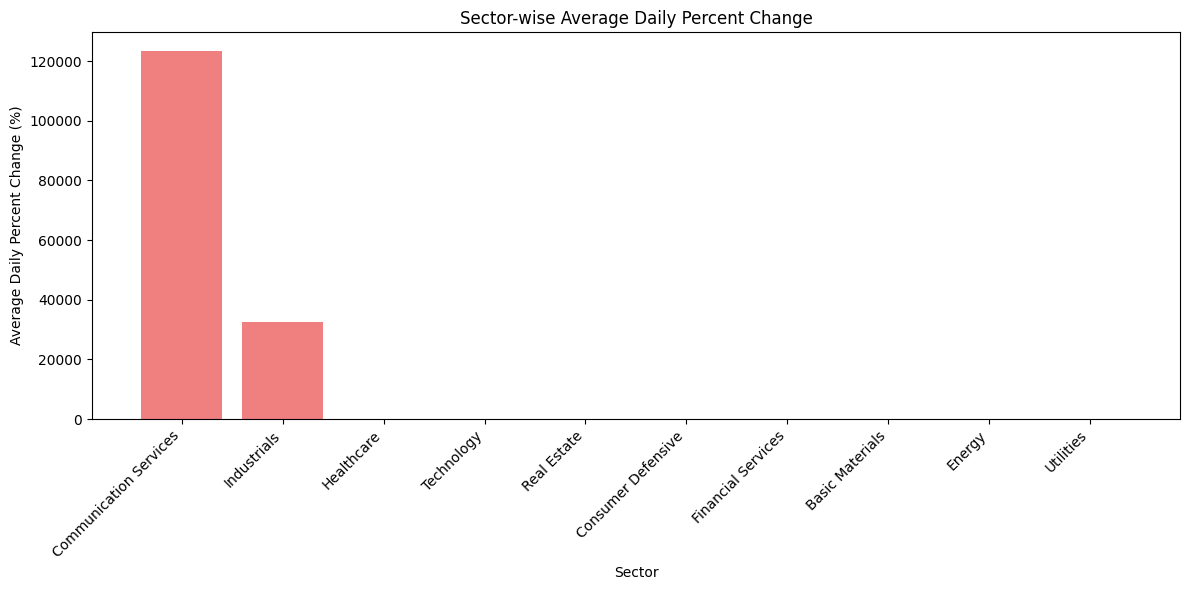

In [ ]:
# Calculate the daily percentage change for each stock in each sector
df['Pct_Change'] = df.groupby('Ticker')['Close'].pct_change() * 100

# Calculate the average daily percent change for each sector
sector_pct_change = df.groupby('Sector')['Pct_Change'].mean().reset_index()

sector_pct_change = sector_pct_change.sort_values(by='Pct_Change', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sector_pct_change['Sector'], sector_pct_change['Pct_Change'], color='lightcoral')
plt.xlabel('Sector')
plt.ylabel('Average Daily Percent Change (%)')
plt.title('Sector-wise Average Daily Percent Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

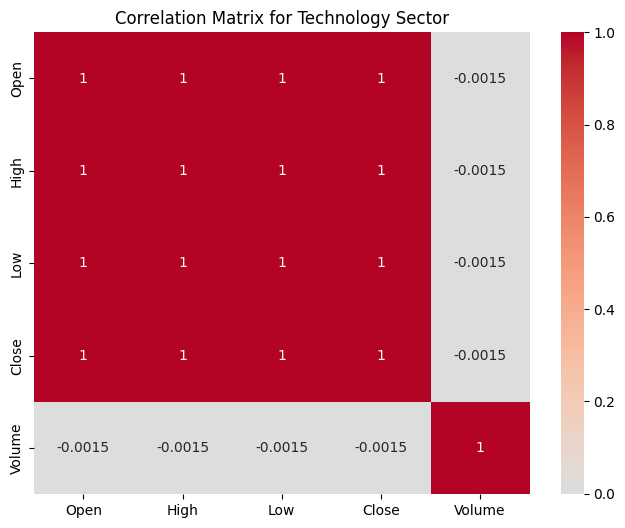

In [ ]:
# Group by sector and calculate correlation matrix for each sector
correlation_by_sector = df.groupby('Sector').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Volume': 'mean'
}).corr()

technology_sector = df[df['Sector'] == 'Technology']
correlation_technology = technology_sector[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plotting the correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_technology, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Technology Sector')
plt.show()